Exp 5 : SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import where
import pandas as pd

df = pd.read_csv(
    "C:\\Users\\DELL\\Desktop\\College\\Practicals-Apr-2025\\ADS_codes\\ADS Datasets\\Churn_Modelling.csv"
)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == 'O':
    label_encode = LabelEncoder()
    df[col] = label_encode.fit_transform(df[col])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop("Exited", axis=1)
y = df["Exited"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=101
)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1585
           1       0.57      0.70      0.63      1601

    accuracy                           0.58      3186
   macro avg       0.59      0.58      0.58      3186
weighted avg       0.59      0.58      0.58      3186



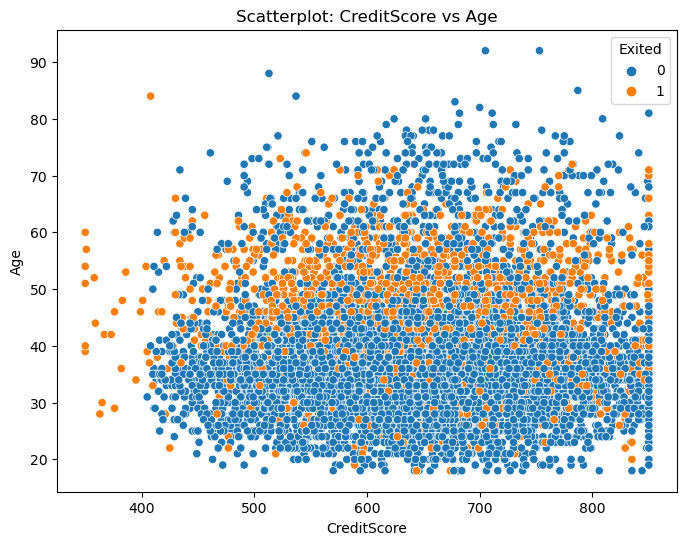

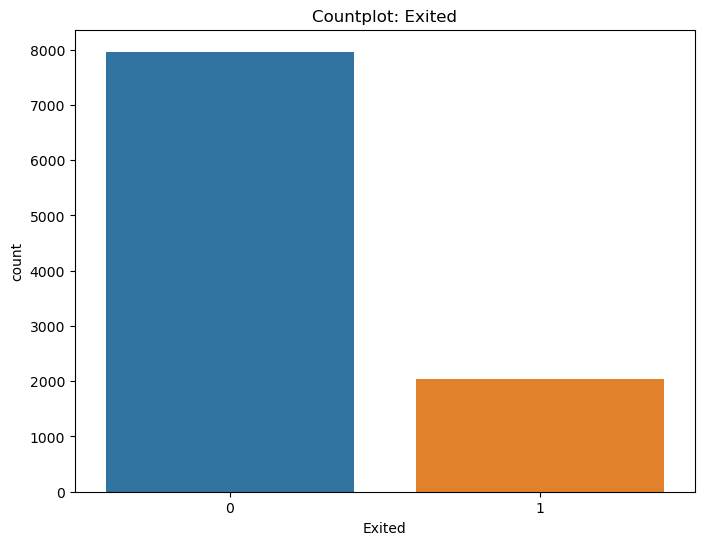

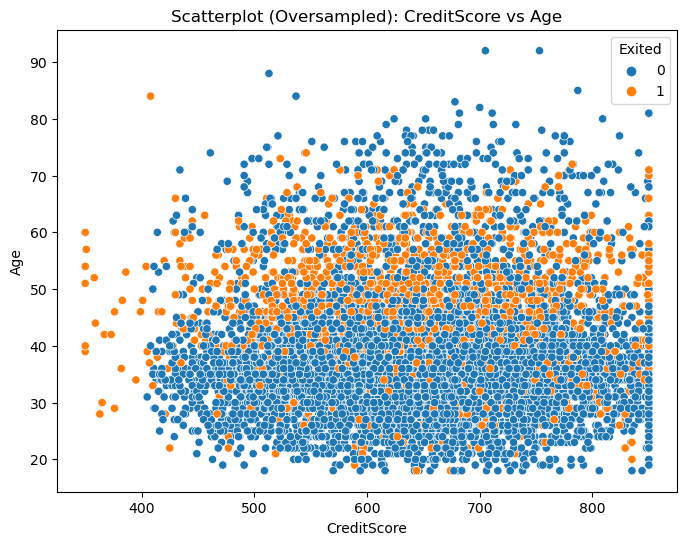

In [15]:
# Visualizations
# Scatter plot for CreditScore vs Age colored by Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Scatterplot: CreditScore vs Age")
plt.show()

# Countplot for the Exited variable in the original dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Exited")
plt.title("Countplot: Exited")
plt.show()

# Scatter plot for CreditScore vs Age in the oversampled dataset (SMOTE applied)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="Exited")
plt.title("Scatterplot (Oversampled): CreditScore vs Age")
plt.show()